## Section 1
Sub-question: Are current solar and wind power plants in the country being predominantly built in areas of high solar and wind power potential?

1. Heatmap of Ph Regions according to Solar Potential per administrative boundary up to Barangay Level
2. Overlay the locations of wind and solar power plants in the country
3. Create histogram of # powerplants per band of wind potential per sqm

#### 1. Heatmap of Ph Regions according to Solar Potential per administrative boundary up to Barangay Level

Solar Potential

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import xlsxwriter
from shapely.geometry import Point, Polygon
import seaborn as sns

In [2]:

# taken from https://data.humdata.org/dataset/cod-ab-phl
fp = ".\Data\Shapefiles\Philippines\phl_admbnda_adm2_psa_namria_20200529.shp"
map_df = gpd.read_file(fp)
map_df.columns
map_df = map_df[['ADM2_EN', 'geometry']]



In [ ]:
# Data for Wind Potential Heatmap
datafp = '.\Data\WindPotential\Philippine_regions_windpotential.csv'
wind_potential_data = gpd.read_file(datafp)
wind_potential_data = wind_potential_data[["ADM2_EN", "mean_power_density"]]
wind_potential_data.mean_power_density = pd.to_numeric(wind_potential_data.mean_power_density, errors='coerce')

merged_wind = map_df.set_index("ADM2_EN").join(wind_potential_data.set_index("ADM2_EN"))
variable_wind = "mean_power_density"

# Data for Solar Potential Heatmap
datafp = '.\Data\SolarPotential\Philippine_regions_pvpotential.csv'
solar_potential_data = gpd.read_file(datafp)
solar_potential_data = solar_potential_data[["ADM2_EN", "avg_specific_pv_output"]]
solar_potential_data.avg_specific_pv_output = pd.to_numeric(solar_potential_data.avg_specific_pv_output, errors='coerce')

merged_solar = map_df.set_index("ADM2_EN").join(solar_potential_data.set_index("ADM2_EN"))
variable_solar = "avg_specific_pv_output"
vmin, vmax = 120, 220

# create figure and axes for Matplotlib
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(50, 25))

# Modifying Axes
ax1.axis("off")
ax1.set_title("Wind Potential", fontdict = {"fontsize": "25", "fontweight":"3"})
ax1.tick_params(labelsize=10)
ax1.figure.axes[1].tick_params(labelsize=30)
#ax1.annotate("Source: Global Wind Map, 2022",xy=(0.1, .08), xycoords="figure fraction", horizontalalignment="left", verticalalignment="top", fontsize=12, color="#555555")

ax2.axis("off")
ax2.set_title("Solar Potential", fontdict = {"fontsize": "25", "fontweight":"3"})
ax1.figure.axes[1].tick_params(labelsize=30)
#ax2.annotate("Source: Global Solar Map, 2022",xy=(0.1, .1), xycoords="figure fraction", horizontalalignment="left", verticalalignment="top", fontsize=12, color="#555555")


# Plotting
merged_wind.plot(column=variable_wind, cmap="GnBu", linewidth=0.8, ax=ax1, edgecolor="0.8", legend=True)
merged_solar.plot(column=variable_solar, cmap="YlOrBr", linewidth=0.8, ax=ax2, edgecolor="0.8", legend=True)


C:\Users\rayno\AppData\Local\Temp\ipykernel_21200\400905750.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  powerplants = pd.read_csv(powerplantsfp)
C:\Program Files\Python310\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


Text(247.88427187839767, 0.5, 'Latitude')

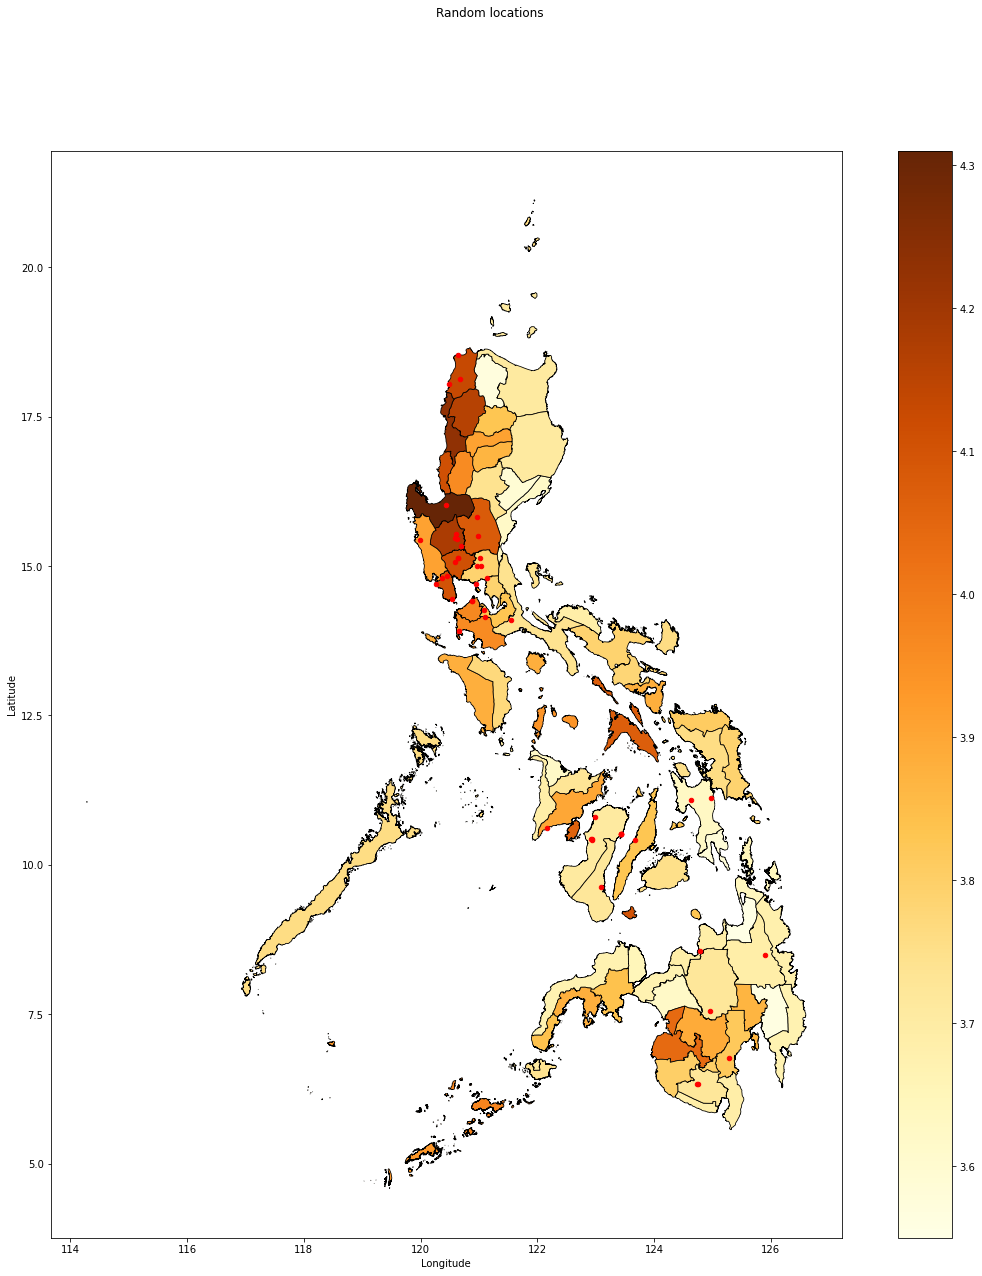

In [4]:
# PowerPlants
powerplantsfp = '.\Data\PowerPlants\global_power_plant_database.csv'
powerplants = pd.read_csv(powerplantsfp)
powerplants = powerplants[powerplants.country_long == 'Philippines']
powerplants = powerplants[powerplants.primary_fuel == 'Solar']
powerplants.capacity_mw = pd.to_numeric(powerplants.capacity_mw, errors='coerce')
crs = {'init':'epsg:4326'}
geometry=[Point(xy) for xy in zip(powerplants["longitude"], powerplants["latitude"])]
geodata=gpd.GeoDataFrame(powerplants,crs=crs, geometry=geometry)

fig, ax = plt.subplots(figsize=(20,20))

# Data for Solar Potential Heatmap
datafp = '.\Data\SolarPotential\Philippine_regions_pvpotential.csv'
solar_potential_data = gpd.read_file(datafp)
solar_potential_data = solar_potential_data[["ADM2_EN", "avg_specific_pv_output"]]
solar_potential_data.avg_specific_pv_output = pd.to_numeric(solar_potential_data.avg_specific_pv_output, errors='coerce')

merged_solar = map_df.set_index("ADM2_EN").join(solar_potential_data.set_index("ADM2_EN"))
variable_solar = "avg_specific_pv_output"

merged_solar.plot(column=variable_solar, cmap="YlOrBr", linewidth=0.8, ax=ax, edgecolor='k', alpha=1, legend=True)
geodata.plot(ax=ax, color='red', markersize=20)

fig.suptitle('Random locations', fontsize=12)
ax.set_xlabel('Longitude', fontsize=10)
ax.set_ylabel('Latitude', fontsize='medium')


A majority of solar powerplants in the Philippines have a capacity of less than 60 MW. ----Explain the Three Graphs----- -------Implement Binning-----

C:\Users\rayno\AppData\Local\Temp\ipykernel_21200\1521965108.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  powerplants[variable_solar][index] = merged_solar.loc[a.index.array[0]][variable_solar]


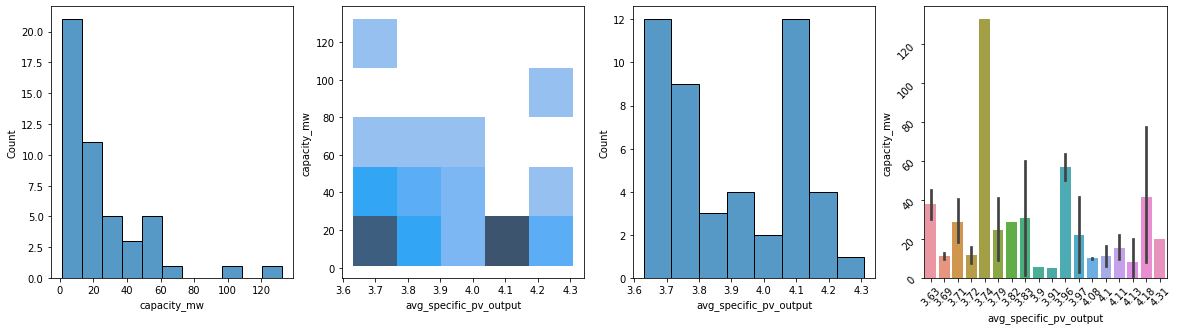

In [27]:

powerplants[variable_solar] = None
powerplants[variable_solar+"_bin"] = None       # IMPLEMENT BIN
for index, entry in powerplants.iterrows():
    a = merged_solar.geometry.contains(entry['geometry'])
    a = a[a == True]
    powerplants[variable_solar][index] = merged_solar.loc[a.index.array[0]][variable_solar]
    #IMPLEMENT BIN

fig, (h1,h2,h3,h4) = plt.subplots(1,4, figsize=(20, 5))
sns.histplot(x='capacity_mw', data=powerplants, ax=h1)
sns.histplot(x=variable_solar, y="capacity_mw", data=powerplants, bins=5, ax=h2)
sns.histplot(data=powerplants, x=variable_solar, bins=8, ax=h3)
sns.barplot(x=variable_solar, y="capacity_mw", data=powerplants, ax=h4)
h4.tick_params(labelrotation=45)

## Section 2

Sub-question: How much wind and solar energy is the Philippines projected to generate in the future? Can countries around the world be clustered based on solar and wind capacity, population, and GDP? If so, to which cluster does the Philippines belong, and has its cluster membership changed over time?

1. Take time-series data on [GDP, population, solar and wind capacity] per country. 
2. Perform KNN on the dataset from 1 per year, animate the result. Display in a 3D graph.
3. Highlight the Philippines performance and other notable countries in the KNN animation. Analysis.

4. Train a sequential NN on (gdp, population, cost of wind/solar power generation, cost of battery storage). 
5. Predict for coming 30 years based on projected gdp, solar/wind cost, population, and cost of battery storage)

6. Repeat 4 and 5 but on a RNN
